## Mobility of a sedimenting lattice as a function of volume fraction


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import pystokes, os, sys


In [2]:
#Parameters
Np=1
a, eta, dim = 1.0, 1.0/6, 3
ta =(4*np.pi/3)**(1.0/3) 
L = ta/np.asarray([0.1, 0.3, 0.4, 0.5, 0.6, 0.7])

# Memory allocation
v = np.zeros(dim*Np)         
r = np.zeros(dim*Np)        
F = np.zeros(dim*Np)  
vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

mu=1.0/(6*np.pi*eta*a)

In [3]:
L

array([16.11991954,  5.37330651,  4.02997989,  3.22398391,  2.68665326,
        2.30284565])

[ 0.          0.         -0.22019563]
[ 0.          0.         -0.10036148]
[ 0.          0.         -0.11683878]
[ 0.          0.         -0.20971045]
[ 0.          0.         -0.39807509]
[ 0.          0.         -0.70103129]


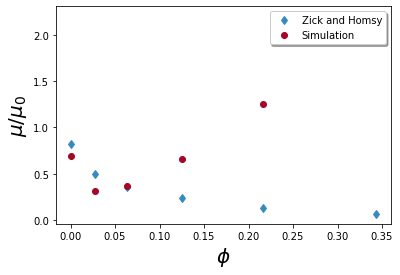

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  0.692		 0.825	
0.027		  0.315		 0.498	
0.064		  0.367		 0.356	
0.125		  0.659		 0.233	
0.216		  1.251		 0.134	
0.343		  2.202		 0.065	


In [4]:
# Deafult value of xi = sqrt (pi/L)

Nb, Nm = 1, 4   
# 2Nb+1 periodic boxes and Nm modes


for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    ff = pystokes.forceFields.Forces(Np)
    ff.sedimentation(F, g=-1)                          
    
    pRbm = pystokes.periodic.Rbm(a, Np, eta, L[i])#, xi=0.88*np.sqrt(np.pi)/L[i])   
    pRbm.mobilityTT(v, r, F, Nb, Nm)      
    print(v)
    
    phi[i] = (4*np.pi*a**3)/(3*L[i]**3)
    mu00 = mu*F[2]
    vv[i] = v[2]/mu00   
    

exR = [.825, .498, .356, .233, .134, .065]
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')

plt.xlabel(r'$\phi$', fontsize=20); plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
plt.legend(loc='upper right', shadow=True); plt.show()

print ('volume fraction   simulation\t Zick & Homsy (1982)')
for i in range(np.size(L)):
    print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))

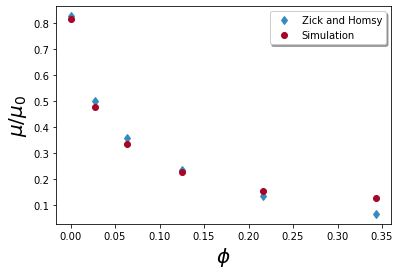

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  0.815		 0.825	
0.027		  0.476		 0.498	
0.064		  0.336		 0.356	
0.125		  0.226		 0.233	
0.216		  0.153		 0.134	
0.343		  0.125		 0.065	


In [5]:
# Choose xi = 0.5*sqrt (pi/L)


Nb, Nm = 1, 4   
# 2Nb+1 periodic boxes and Nm modes


for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    ff = pystokes.forceFields.Forces(Np)
    ff.sedimentation(F, g=-1)                          
    
    xi = 0.5*np.sqrt(np.pi)/L[i]
    pRbm = pystokes.periodic.Rbm(a, Np, eta, L[i], xi)   
    pRbm.mobilityTT(v, r, F, Nb, Nm)                  
    
    phi[i] = (4*np.pi*a**3)/(3*L[i]**3)
    mu00 = mu*F[2]
    vv[i] = v[2]/mu00   
    

exR = [.825, .498, .356, .233, .134, .065]
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')

plt.xlabel(r'$\phi$', fontsize=20); plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
plt.legend(loc='upper right', shadow=True); plt.show()

print ('volume fraction   simulation\t Zick & Homsy (1982)')
for i in range(np.size(L)):
    print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))

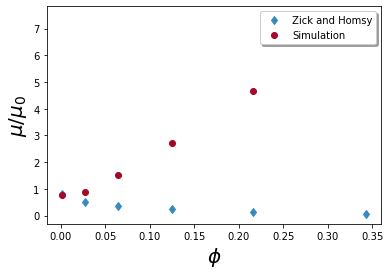

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  0.769		 0.825	
0.027		  0.883		 0.498	
0.064		  1.517		 0.356	
0.125		  2.729		 0.233	
0.216		  4.662		 0.134	
0.343		  7.460		 0.065	


In [6]:
# Choose xi = 2*sqrt (pi/L)


Nb, Nm = 1, 4   
# 2Nb+1 periodic boxes and Nm modes


for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    ff = pystokes.forceFields.Forces(Np)
    ff.sedimentation(F, g=-1)                          
    
    xi = 2*np.sqrt(np.pi)/L[i]
    pRbm = pystokes.periodic.Rbm(a, Np, eta, L[i])   
    pRbm.mobilityTT(v, r, F, Nb, Nm, xi)                  
    
    phi[i] = (4*np.pi*a**3)/(3*L[i]**3)
    mu00 = mu*F[2]
    vv[i] = v[2]/mu00   
    

exR = [.825, .498, .356, .233, .134, .065]
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')

plt.xlabel(r'$\phi$', fontsize=20); plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
plt.legend(loc='upper right', shadow=True); plt.show()

print ('volume fraction   simulation\t Zick & Homsy (1982)')
for i in range(np.size(L)):
    print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))

Thus it can be seen that the optimal choice of $\xi$ is crucial. Nijboer and De Wette have shown that $\xi=\pi^{1/2}/V^{1/3}$ is a good choice for a cubic lattice. This is also the default value in PyStokes. 